# Download Kaggle Dataset

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"espressifali","key":"1745b17f3aedbe9c3a7ef548f870ddbd"}'}

In [7]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
! cp kaggle.json ~/.kaggle/

In [8]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [9]:
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           4877        154  1.0              
mvieira101/global-cost-of-living                                Global Cost of Living                                 1MB  2022-12-03 16:37:53            719         36  0.9705882        
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                      9KB  2022-10-06 08:55:25          21299        574  1.0              
thedevastator/jobs-dataset-from-glassdoor                   

In [10]:
! kaggle datasets download -d gti-upm/leapgestrecog

 99% 2.12G/2.13G [00:14<00:00, 149MB/s]
100% 2.13G/2.13G [00:14<00:00, 161MB/s]


In [18]:
! unzip /content/leapgestrecog.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: data/leapgestrecog/leapGestRecog/07/06_index/

In [23]:
%rm -rf /content/data

# Gesture Detection

In [4]:
# Here we import everything we need for the project

%matplotlib inline
from google.colab import files
import os

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Sklearn
from sklearn.model_selection import train_test_split # Helps with organizing data for training
from sklearn.metrics import confusion_matrix # Helps present results as a confusion-matrix

print(tf.__version__)

2.9.2


In [5]:
%rm -rf  /content/data
%rm -rf  /content/leapGestRecog/00/03_fist/
%rm -rf  /content/leapGestRecog/00/04_fist_moved
%rm -rf  /content/leapGestRecog/00/08_palm_moved/
%rm -rf  /content/leapGestRecog/00/10_down

%rm -rf  /content/leapGestRecog/01/03_fist/
%rm -rf  /content/leapGestRecog/01/04_fist_moved/
%rm -rf  /content/leapGestRecog/01/08_palm_moved/
%rm -rf  /content/leapGestRecog/01/10_down

%rm -rf  /content/leapGestRecog/02/03_fist/
%rm -rf  /content/leapGestRecog/02/04_fist_moved/
%rm -rf  /content/leapGestRecog/02/08_palm_moved/
%rm -rf  /content/leapGestRecog/02/10_down

%rm -rf  /content/leapGestRecog/03/03_fist/
%rm -rf  /content/leapGestRecog/03/04_fist_moved/
%rm -rf  /content/leapGestRecog/03/08_palm_moved/
%rm -rf  /content/leapGestRecog/03/10_down

%rm -rf  /content/leapGestRecog/04/03_fist/
%rm -rf  /content/leapGestRecog/04/04_fist_moved/
%rm -rf  /content/leapGestRecog/04/08_palm_moved/
%rm -rf  /content/leapGestRecog/04/10_down

%rm -rf  /content/leapGestRecog/05/03_fist/
%rm -rf  /content/leapGestRecog/05/04_fist_moved/
%rm -rf  /content/leapGestRecog/05/08_palm_moved/
%rm -rf  /content/leapGestRecog/05/10_down

%rm -rf  /content/leapGestRecog/06/03_fist/
%rm -rf  /content/leapGestRecog/06/04_fist_moved/
%rm -rf  /content/leapGestRecog/06/08_palm_moved/
%rm -rf  /content/leapGestRecog/06/10_down

%rm -rf  /content/leapGestRecog/07/03_fist/
%rm -rf  /content/leapGestRecog/07/04_fist_moved/
%rm -rf  /content/leapGestRecog/07/08_palm_moved/
%rm -rf  /content/leapGestRecog/07/10_down

%rm -rf  /content/leapGestRecog/08/03_fist
%rm -rf  /content/leapGestRecog/08/04_fist
%rm -rf  /content/leapGestRecog/08/08_palm
%rm -rf  /content/leapGestRecog/08/10_down

%rm -rf  /content/leapGestRecog/09/03_fist
%rm -rf  /content/leapGestRecog/09/04_fist
%rm -rf  /content/leapGestRecog/09/08_palm
%rm -rf  /content/leapGestRecog/09/10_down

%rm -rf  /content/leapGestRecog/10/03_fist
%rm -rf  /content/leapGestRecog/10/04_fist
%rm -rf  /content/leapGestRecog/10/08_palm
%rm -rf  /content/leapGestRecog/10/10_down

%rm -rf /content/leapGestRecog/09/08_palm_moved
%rm -rf /content/leapGestRecog/08/08_palm_moved

%rm -rf /content/leapGestRecog/09/04_fist_moved
%rm -rf /content/leapGestRecog/08/04_fist_moved

In [6]:
# We need to get all the paths for the images to later load them
imagepaths = []

# Go through all the files and subdirectories inside a folder and save path to images inside list
for root, dirs, files in os.walk(".", topdown=False): 
  for name in files:
    path = os.path.join(root, name)
    if path.endswith("png"): # We want only the images
      imagepaths.append(path)

print(len(imagepaths)) # If > 0, then a PNG image was loaded
print(path)

12000
./X_cal.pkl


In [7]:
def plot_image(path):
  img = cv2.imread(path) # Reads the image into a numpy.array
  print('Original Dimensions : ',img.shape)
  img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (RGB)
  print(img_cvt.shape) # Prints the shape of the image just to check
  plt.grid(False) # Without grid so we can see better
  plt.imshow(img_cvt) # Shows the image
  plt.xlabel("Width")
  plt.ylabel("Height")
  plt.title("Image " + path)

Original Dimensions :  (240, 640, 3)
(240, 640)


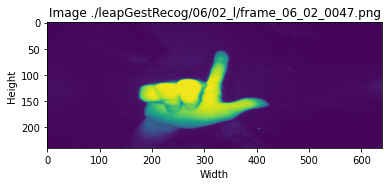

In [8]:
plot_image(imagepaths[0]) #We plot the first image from our imagepaths array

In [9]:
print(imagepaths)

['./leapGestRecog/06/02_l/frame_06_02_0047.png', './leapGestRecog/06/02_l/frame_06_02_0002.png', './leapGestRecog/06/02_l/frame_06_02_0174.png', './leapGestRecog/06/02_l/frame_06_02_0137.png', './leapGestRecog/06/02_l/frame_06_02_0117.png', './leapGestRecog/06/02_l/frame_06_02_0109.png', './leapGestRecog/06/02_l/frame_06_02_0004.png', './leapGestRecog/06/02_l/frame_06_02_0074.png', './leapGestRecog/06/02_l/frame_06_02_0195.png', './leapGestRecog/06/02_l/frame_06_02_0073.png', './leapGestRecog/06/02_l/frame_06_02_0121.png', './leapGestRecog/06/02_l/frame_06_02_0175.png', './leapGestRecog/06/02_l/frame_06_02_0094.png', './leapGestRecog/06/02_l/frame_06_02_0163.png', './leapGestRecog/06/02_l/frame_06_02_0126.png', './leapGestRecog/06/02_l/frame_06_02_0157.png', './leapGestRecog/06/02_l/frame_06_02_0007.png', './leapGestRecog/06/02_l/frame_06_02_0161.png', './leapGestRecog/06/02_l/frame_06_02_0029.png', './leapGestRecog/06/02_l/frame_06_02_0141.png', './leapGestRecog/06/02_l/frame_06_02_01

In [90]:
X = [] # Image data
y = [] # Labels
# x=[]
# Loops through imagepaths to load images and labels into arrays
for path in imagepaths:
  img1 = cv2.imread(path) # Reads image and returns np.array
  img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
  # img = cv2.resize(img, (320, 120)) # Reduce image size so training can be faster
  img = cv2.resize(img2, (96, 96))
  # x.append(img)
  
  # img3= img.astype('float32')
  # img4=img3/255
  
  
  X.append(img)
  # print("shape of img",img.shape)
  # Processing label in image path
  category = path.split("/")[3]
  print(path)
  print(category)
  label = int(category.split("_")[0]) # We need to convert 10_down to 00_down, or else it crashes
  print(label)
  if label == 1:
    label = 0
    y.append(label)
  elif label == 2:
    label = 1
    y.append(label)
  elif label == 5:
    label = 2
    y.append(label)
  elif label == 6 :
    label = 3
    y.append(label)
  elif label == 7:
    label = 4
    y.append(label) 
  elif label == 9:
    label = 5
    y.append(label)
  else:
    print("Different value")
print("done")



Streaming output truncated to the last 5000 lines.
9
./leapGestRecog/00/09_c/frame_00_09_0198.png
09_c
9
./leapGestRecog/00/09_c/frame_00_09_0192.png
09_c
9
./leapGestRecog/00/09_c/frame_00_09_0017.png
09_c
9
./leapGestRecog/00/09_c/frame_00_09_0150.png
09_c
9
./leapGestRecog/00/09_c/frame_00_09_0141.png
09_c
9
./leapGestRecog/00/09_c/frame_00_09_0080.png
09_c
9
./leapGestRecog/00/09_c/frame_00_09_0136.png
09_c
9
./leapGestRecog/00/09_c/frame_00_09_0077.png
09_c
9
./leapGestRecog/00/09_c/frame_00_09_0137.png
09_c
9
./leapGestRecog/00/09_c/frame_00_09_0099.png
09_c
9
./leapGestRecog/00/09_c/frame_00_09_0199.png
09_c
9
./leapGestRecog/00/09_c/frame_00_09_0166.png
09_c
9
./leapGestRecog/00/09_c/frame_00_09_0188.png
09_c
9
./leapGestRecog/00/09_c/frame_00_09_0090.png
09_c
9
./leapGestRecog/00/09_c/frame_00_09_0095.png
09_c
9
./leapGestRecog/00/09_c/frame_00_09_0097.png
09_c
9
./leapGestRecog/00/09_c/frame_00_09_0121.png
09_c
9
./leapGestRecog/00/09_c/frame_00_09_0067.png
09_c
9
./leapGestR

In [ ]:
# import seaborn as sns 
# # img = img/255 plt.figure(figsize=(30,30)) 
# sns.heatmap(X[5], annot= True, cmap="binary")
# sns.heatmap(x[5], annot= True, cmap="binary")

In [91]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [92]:
len(X)

12000

In [93]:
np.unique(y)

array([0, 1, 2, 3, 4, 5])

In [94]:
# Turn X and y into np.array to speed up train_test_split
X = np.array(X, dtype="uint8")
# X = X.reshape(len(imagepaths), 120, 320, 1) # Needed to reshape so CNN knows it's different images
X = X.reshape(len(imagepaths), 96, 96, 1)
y = np.array(y)

print("llength of img path: ", len(imagepaths))
print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))
print("Shaoe of X",X.shape)
print("Shape of y",y.shape)

print(y[0], imagepaths[0]) # Debugging

llength of img path:  12000
Images loaded:  12000
Labels loaded:  12000
Shaoe of X (12000, 96, 96, 1)
Shape of y (12000,)
1 ./leapGestRecog/06/02_l/frame_06_02_0047.png


In [95]:
ts = 0.3 # Percentage of images that we want to use for testing. The rest is used for training.
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=ts, random_state=0)
X_test, X_cal, y_test, y_cal = train_test_split(X_test1, y_test1, test_size=ts, random_state=0)

In [96]:
numpy.set_printoptions(threshold=sys.maxsize)

In [97]:
len(X_train)

8400

In [98]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5])

In [ ]:
# X = [] # Image data
# y = [] # Labels

# # Loops through imagepaths to load images and labels into arrays
# for path in imagepaths:
#   img = cv2.imread(path) # Reads image and returns np.array
#   img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
#   # img = cv2.resize(img, (320, 120)) # Reduce image size so training can be faster
#   img = cv2.resize(img, (240, 240))
#   X.append(img)
#   category = path.split("/")[3]
#   # print(category)
#   label = int(category.split("_")[0][1]) # We need to convert 10_down to 00_down, or else it crashes
#   y.append(label)
# # X = np.array(X, dtype="uint8")
# # # X = X.reshape(len(imagepaths), 120, 320, 1) # Needed to reshape so CNN knows it's different images
# # X = X.reshape(len(imagepaths), 240, 240, 1)
# # y = np.array(y)

In [ ]:
# import sys
# from random import *
# i = randint(1, 10000) 
# np.set_printoptions(threshold=sys.maxsize)
# print (X[i])
# print(y[i])
# print(i)

In [99]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)
print('X_cal',X_cal.shape)
print('y_cal',y_cal.shape)

X_train (8400, 96, 96, 1)
y_train (8400,)
X_test (2520, 96, 96, 1)
y_test (2520,)
X_cal (1080, 96, 96, 1)
y_cal (1080,)


In [100]:
calib_dataset = X_cal[0:1800:20]
# print(calib_dataset)
print(len(calib_dataset))

54


In [64]:
import pickle

In [65]:
file_name='X_test.pkl'
f = open(file_name,'wb')
pickle.dump(X_test,f)
f.close()
file_name='y_test.pkl'
f = open(file_name,'wb')
pickle.dump(y_test,f)
f.close()

file_name='X_train.pkl'
f = open(file_name,'wb')
pickle.dump(X_train,f)
f.close()
file_name='y_train.pkl'
f = open(file_name,'wb')
pickle.dump(y_train,f)
f.close()

file_name='X_cal.pkl'
f = open(file_name,'wb')
pickle.dump(X_cal,f)
f.close()
file_name='y_cal.pkl'
f = open(file_name,'wb')
pickle.dump(y_cal,f)
f.close()



In [66]:
file_name='X.pkl'
f = open(file_name,'wb')
pickle.dump(X,f)
f.close()
file_name='y.pkl'
f = open(file_name,'wb')
pickle.dump(y,f)
f.close()
from google.colab import files
files.download('/content/X.pkl')
files.download('/content/y.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# # Calibration
# with open('X_train.pkl', 'rb') as f:
#     (test_images) = pickle.load(f)

# with open('y_train.pkl', 'rb') as f:
#     (test_labels) = pickle.load(f)
#     # print(test_images)
# # test_images = test_images / 255.0
# print('done')

In [67]:
from google.colab import files
files.download('/content/X_train.pkl')
files.download('/content/X_test.pkl')
files.download('/content/y_train.pkl')
files.download('/content/y_test.pkl')
files.download('/content/X_cal.pkl')
files.download('/content/y_cal.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# X_test[3]

In [ ]:
# %rm -rf /content/tmp_model

In [ ]:
# Recreate the exact same model, including weights and optimizer.
# model = keras.models.load_model('handrecognition_model.h5')
# model.summary()

# To use the pre-trained model, just load it and skip to the next session.

In [51]:
# Import of keras model and hidden layers for our convolutional network
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

In [59]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# model = Sequential()
# model.add(Conv2D(28, kernel_size=(3,3), input_shape=(96, 96,1)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
# model.add(Dense(128, activation=tf.nn.relu))
# model.add(Dropout(0.2))
# model.add(Dense(6,activation=tf.nn.softmax))



model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(96, 96,1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))


# model = Sequential()
# model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(96, 96,1))) 
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))
# model.add(Conv2D(64, (3, 3), activation='relu')) 
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(6, activation='softmax'))

In [60]:
# Configures the model for training
model.compile(optimizer='adam', # Optimization routine, which tells the computer how to adjust the parameter values to minimize the loss function.
              loss='sparse_categorical_crossentropy', # Loss function, which tells us how bad our predictions are.
              metrics=['accuracy']) # List of metrics to be evaluated by the model during training and testing.

In [61]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 92, 92, 32)        832       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 46, 46, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 64)      

In [101]:
y_test[50]

3

In [102]:
X_test[50]

array([[[  4],
        [  4],
        [  3],
        [  4],
        [  4],
        [  4],
        [  3],
        [  4],
        [  4],
        [  4],
        [  4],
        [  4],
        [  5],
        [  6],
        [  5],
        [  6],
        [  7],
        [  5],
        [  7],
        [  7],
        [  6],
        [  6],
        [  6],
        [  7],
        [  7],
        [  7],
        [  8],
        [  8],
        [  7],
        [  6],
        [  9],
        [  8],
        [  8],
        [  8],
        [  8],
        [  4],
        [  6],
        [  7],
        [  7],
        [  6],
        [  6],
        [  7],
        [  7],
        [  7],
        [  6],
        [  6],
        [  7],
        [  7],
        [  6],
        [  6],
        [  5],
        [  6],
        [  6],
        [  5],
        [  5],
        [  4],
        [  5],
        [  5],
        [  5],
        [  5],
        [  5],
        [  6],
        [  5],
        [  5],
        [  7],
        [  8],
        [ 

In [63]:
# Trains the model for a given number of epochs (iterations on a dataset) and validates it.
history=model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
132/132 [==============================] - 82s 615ms/step - loss: 0.8999 - accuracy: 0.8911 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 2/5
132/132 [==============================] - 80s 604ms/step - loss: 6.7515e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 3/5
132/132 [==============================] - 82s 621ms/step - loss: 1.2023e-04 - accuracy: 1.0000 - val_loss: 1.0656e-04 - val_accuracy: 1.0000
Epoch 4/5
132/132 [==============================] - 80s 603ms/step - loss: 2.1092e-05 - accuracy: 1.0000 - val_loss: 7.1084e-05 - val_accuracy: 1.0000
Epoch 5/5
132/132 [==============================] - 79s 597ms/step - loss: 1.2216e-05 - accuracy: 1.0000 - val_loss: 5.3121e-05 - val_accuracy: 1.0000


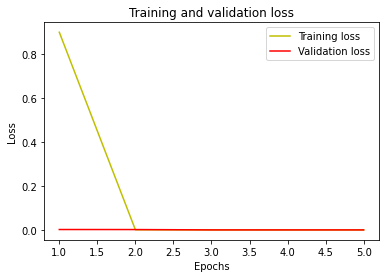

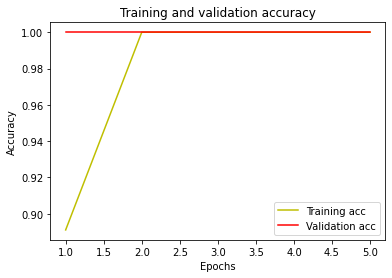

In [68]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [69]:
# Save entire model to a HDF5 file
model.save('handrecognition_model.h5')

**Testing of the model**

In [70]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

79/79 [==============================] - 9s 118ms/step - loss: 5.3121e-05 - accuracy: 1.0000
Test accuracy: 100.00%


In [71]:
predictions = model.predict(X_test) # Make predictions towards the test set

79/79 [==============================] - 6s 80ms/step


In [72]:
np.argmax(predictions[0]), y_test[0] # If same, got it right

(5, 5)

In [73]:
# Function to plot images and labels for validation purposes
def validate_9_images(predictions_array, true_label_array, img_array):
  # Array for pretty printing and then figure size
  # class_names = ["down", "palm", "l", "fist", "fist_moved", "thumb", "index", "ok", "palm_moved", "c"] 
  class_names = ["palm", "l", "thumb", "index", "ok", "c"] 
  plt.figure(figsize=(15,5))
  
  for i in range(1, 10):
    # Just assigning variables
    prediction = predictions_array[i]
    true_label = true_label_array[i]
    img = img_array[i]
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    # Plot in a good way
    plt.subplot(3,3,i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction) # Get index of the predicted label from prediction
    
    # Change color of title based on good prediction or not
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                  100*np.max(prediction),
                                  class_names[true_label]),
                                  color=color)
  plt.show()

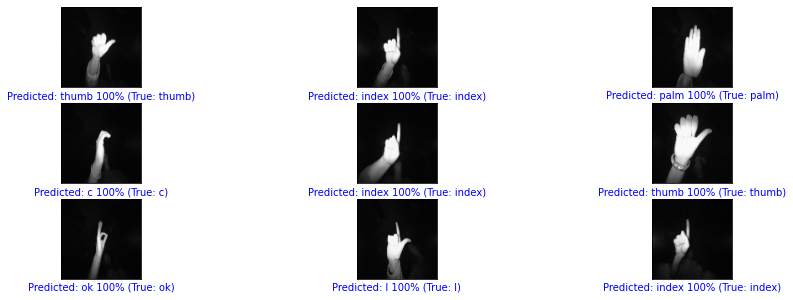

In [74]:
validate_9_images(predictions, y_test, X_test)

In [75]:
y_pred = np.argmax(predictions, axis=1) # Transform predictions into 1-D array with label number

In [ ]:
# H = Horizontal
# V = Vertical

pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=["Predicted Thumb Down", "Predicted Palm (H)", "Predicted L", "Predicted Fist (H)", "Predicted Fist (V)", "Predicted Thumbs up", "Predicted Index", "Predicted OK", "Predicted Palm (V)", "Predicted C"],
             index=["Actual Thumb Down", "Actual Palm (H)", "Actual L", "Actual Fist (H)", "Actual Fist (V)", "Actual Thumbs up", "Actual Index", "Actual OK", "Actual Palm (V)", "Actual C"])

ValueError: ignored

**Conversion to ONXX**

In [76]:
pip install Numba==0.53.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
pip install ONNX==1.9.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
pip install ONNXRuntime==1.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
pip install ONNXOptimizer==0.2.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
pip install tf2onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:

import numpy as np
import onnx
import onnxruntime as rt

import os
import sys
import platform

In [82]:
model = tf.keras.models.load_model("/content/handrecognition_model.h5")
tf.saved_model.save(model, "tmp_model")

In [83]:
!python -m tf2onnx.convert --saved-model tmp_model --output "handrecognition_model.onnx"

/usr/lib/python3.8/runpy.py:127: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2022-12-05 03:56:38,408 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2022-12-05 03:56:38,921 - INFO - Signatures found in model: [serving_default].
2022-12-05 03:56:38,922 - WARNING - '--signature_def' not specified, using first signature: serving_default
2022-12-05 03:56:38,922 - INFO - Output names: ['dense_7']
2022-12-05 03:56:39,155 - INFO - Using tensorflow=2.9.2, onnx=1.9.0, tf2onnx=1.13.0/2c1db5
2022-12-05 03:56:39,155 - INFO - Using opset <onnx, 13>
2022-12-05 03:56:39,564 - INFO - Computed 0 values for constant folding
2022-12-05 03:56:39,821 - INFO - Optimizing ONNX model
2022-12-05 03:56:39,918 - INFO - After optimization: Cast -1 (1->0), Const +1 (11->12), Identity -2 (2->0), Reshape +1 (1->2), Transpose -11 (12->1)

In [84]:
!zip -r /content/tmp_model.zip /content/tmp_model

  adding: content/tmp_model/ (stored 0%)
  adding: content/tmp_model/variables/ (stored 0%)
  adding: content/tmp_model/variables/variables.data-00000-of-00001 (deflated 10%)
  adding: content/tmp_model/variables/variables.index (deflated 66%)
  adding: content/tmp_model/saved_model.pb (deflated 89%)
  adding: content/tmp_model/assets/ (stored 0%)


In [85]:
from google.colab import files
files.download("/content/handrecognition_model.onnx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Quantization**



In [ ]:

import numpy as np
import onnx
import onnxruntime as rt

import os
import sys
import platform
# system_type = platform.system()
# path = f'../{system_type.lower()}'
# if system_type == 'Windows':
#     path = path.replace('/', '\\')
# sys.path.append(path)
# sys.path.append("..")

import calibrator
import evaluator
from optimizer import *
from calibrator import *
from evaluator import *

# onnx_model = onnx.load("hand.onnx")
# optimized_model_path = optimize_fp_model("D:\work\gesture\hand.onnx")

onnx_model = onnx.load("D:\work\gesture\colab trained model with results\handrecognition_model.onnx")
optimized_model_path = optimize_fp_model("D:\work\gesture\colab trained model with results\handrecognition_model.onnx")


ModuleNotFoundError: ignored

In [ ]:

# file_name='X_test.pkl'
# f = open(file_name,'wb')
# pickle.dump(X_test,f)
# f.close()
# file_name='y_test.pkl'
# f = open(file_name,'wb')
# pickle.dump(y_test,f)
# f.close()
#
#


# Calibration
with open('X_test.pkl', 'rb') as f:
    (test_images) = pickle.load(f)

with open('y_test.pkl', 'rb') as f:
    (test_labels) = pickle.load(f)
    # print(test_images)
# test_images = test_images / 255.0
print('done')



In [ ]:

# Prepare the calibration dataset
calib_dataset = test_images[0:5000:50]
pickle_file_path = 'mnist_calib.pickle'



model_proto = onnx.load(optimized_model_path)
print('Generating the quantization table:')


# Initialize an calibrator to quantize the optimized MNIST model to an int16 model using per-tensor minmax quantization method
calib = Calibrator('int16', 'per-tensor', 'minmax')
calib.set_providers(['CPUExecutionProvider'])


# pickle_file_path = leapGestRecog

# Obtain the quantization parameter
calib.generate_quantization_table(model_proto,calib_dataset, pickle_file_path)
# Generate the coefficient files for esp32s3
calib.export_coefficient_to_cpp(model_proto,  pickle_file_path, 'esp32s3', '.', 'handrecognition_coefficient', True)
print("done")



**Evaluate the performance**

In [ ]:
print('Evaluating the performance on esp32s3:')
eva = Evaluator('int16', 'per-tensor', 'esp32s3')
eva.set_providers(['CPUExecutionProvider'])
eva.generate_quantized_model(model_proto, pickle_file_path)

output_names = [n.name for n in model_proto.graph.output]
providers = ['CPUExecutionProvider']
m = rt.InferenceSession(optimized_model_path, providers=providers)

batch_size = 100
batch_num = int(len(test_images) / batch_size)
res = 0
fp_res = 0
input_name = m.get_inputs()[0].name
for i in range(batch_num):
    # int8_model
    [outputs, _] = eva.evalute_quantized_model(test_images[i * batch_size:(i + 1) * batch_size], False)
    res = res + sum(np.argmax(outputs[0], axis=1) == test_labels[i * batch_size:(i + 1) * batch_size])

    # floating-point model
    fp_outputs = m.run(output_names, {input_name: test_images[i * batch_size:(i + 1) * batch_size].astype(np.float32)})
    fp_res = fp_res + sum(np.argmax(fp_outputs[0], axis=1) == test_labels[i * batch_size:(i + 1) * batch_size])
print('accuracy of int8 model is: %f' % (res / len(test_images)))
print('accuracy of fp32 model is: %f' % (fp_res / len(test_images)))

In [ ]:

########################                     Import libraries                   ########################################
import pickle
from optimizer import *
from calibrator import *
import onnx

######################                       Load onnx Model                         #####################################

onnx_model = onnx.load("Model.onnx")


#####################                       Optimization                        #####################################

optimized_model_path = optimize_fp_model("Model.onnx")


######################################        Calibration datset                      #####################################
with open('X_test.pkl', 'rb') as f:
    (test_images) = pickle.load(f)
with open('y_test.pkl', 'rb') as f:
    (test_labels) = pickle.load(f)


# Prepare the calibration dataset
calib_dataset = test_images[0:500:50]
pickle_file_path = 'Model_calib.pickle'


######################                       Load optimize model                        #####################################

model_proto = onnx.load(optimized_model_path)


print('Generating the quantization table:')

calib = Calibrator('int16', 'per-tensor', 'minmax')
calib.set_providers(['CPUExecutionProvider'])
calib.generate_quantization_table(model_proto,calib_dataset, pickle_file_path)

######################                      Saving coefficients                        #####################################

calib.export_coefficient_to_cpp(model_proto,  pickle_file_path, 'esp32s3', '.', 'Model_coefficient', True)
